# EDA and Data Prediction on the Telecom Churn Dataset 

"Churning" refers to the number of Customers or Employees that leave a Company in a given time period. Changes in a business's churn rate can provide valuable insight into an organization.

# Importing  librariers required for Data Analysis and Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Handling Null values and then replacing them with Central Tendancies

In [5]:
df[df["TotalCharges"]==" "]
#TotalCharges column has 11 rows without any value 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df["TotalCharges"].replace(' ',np.nan, inplace=True)
df["TotalCharges"]=df["TotalCharges"].astype(float)
#Replacing the blank space with null value and converting the datatype to float

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

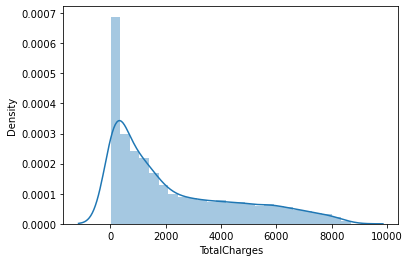

In [8]:
sns.distplot(df.TotalCharges)

When the data is skewed, it is good to consider using the median value for replacing the null values.
Since the above Distribution Plot signifies the data is right skewed , replacing the null values with the median.

In [9]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The datasets descriptions shows that the average Monthly Charges are USD 64.76 and it has maximum gone upto USD 118.75 
The average tenure the telecom company has is of 32 months.
The average Total Amount charged to the customer is USD 2283 and the maximum amount is USD 8684.
By observation, I found that the MonthlyCharges and TotalCharges are not evenly distributed


# Dropping the columns with least correlations

In [11]:
df.drop(['customerID'],axis=1,inplace=True)

Dropping the costumerID column as it has the least correlation with the Churn column

# Handling Categorical Data

In [12]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

Seperating the numerical and categorical columns

In [13]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Performing Label Encoding on the categorical columns so as to convert then into the machine readable form!

In [15]:
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [16]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [17]:
df2=pd.concat([df_num,df_cat],axis=1)

In [18]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Checking For Outliers

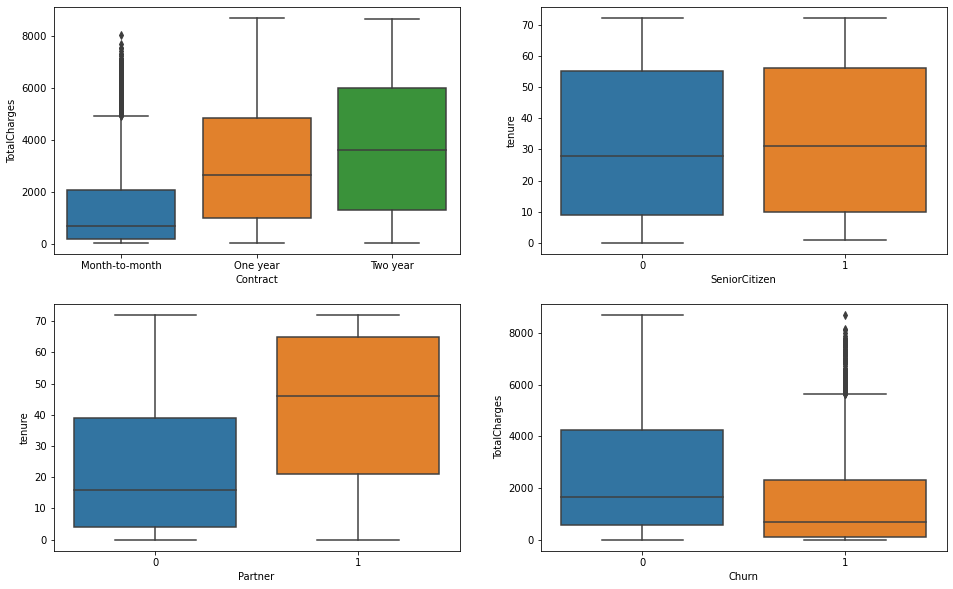

In [19]:
fig,axes=plt.subplots(2,2,figsize=(16,10))
sns.boxplot(data=df, x="Contract", y="TotalCharges",ax=axes[0,0])
sns.boxplot(data=df2, x="SeniorCitizen" , y="tenure",ax=axes[0,1])
sns.boxplot(data=df2, x="Partner" , y="tenure",ax=axes[1,0])
sns.boxplot(data=df2, x="Churn" , y="TotalCharges",ax=axes[1,1])
plt.show()

# Removing Outliers

In [20]:
outlier1= df.loc[(df['Contract']=='Month-to-month') & (df['TotalCharges']>8000)]
outlier2= df.loc[(df['Churn']=='Yes') & (df['TotalCharges']>8500)]
print(outlier1.index,outlier2.index)

Int64Index([3820], dtype='int64') Int64Index([4610], dtype='int64')


In [21]:
df2.drop(index=3820,inplace=True)

In [22]:
df2.drop(index=4610,inplace=True)

By observing the boxplots , came across some outliers and removed them

In [23]:
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Reducing Skewness

In [24]:
for i in df_num:
    print(f"{i}={df2[i].skew()}")

SeniorCitizen=1.8345916532810498
tenure=0.23995276839384197
MonthlyCharges=-0.22068712827085618
TotalCharges=0.963347739293753


TotalCharges column is highly skewed

In [25]:
df2["TotalCharges"]=np.sqrt(df2["TotalCharges"])

In [26]:
df2["TotalCharges"].skew()

0.3096188474579813

Reduced the skewness

# Data Exploration

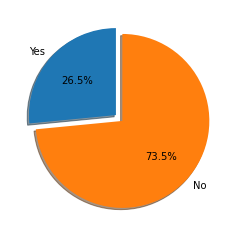

In [27]:
data=[df.Churn.value_counts()[1],df.Churn.value_counts()[0]]
label=['Yes','No']
plt.pie(data,labels=label, shadow=True, autopct="%0.1f%%",explode=[0,0.1],startangle=90)
plt.show() 

26.5% Customers have left within the last month.


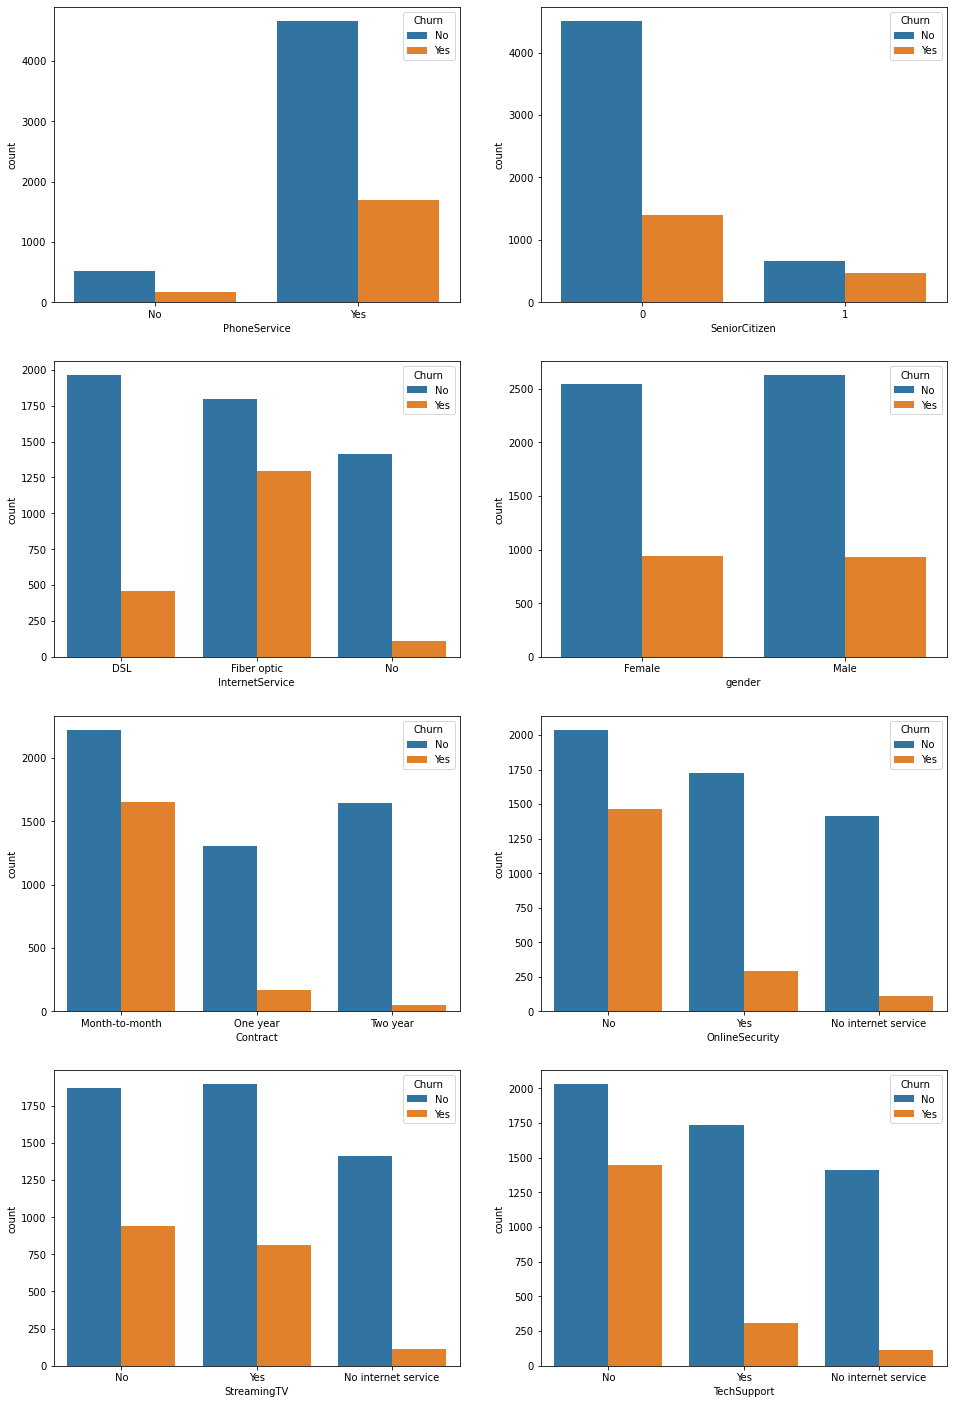

In [28]:
fig,axes=plt.subplots(4,2,figsize=(16,25))
sns.countplot(data=df,x='PhoneService',hue='Churn',ax=axes[0,0])
sns.countplot(data=df,x='SeniorCitizen',hue='Churn',ax=axes[0,1])
sns.countplot(data=df,x='InternetService',hue='Churn',ax=axes[1,0])
sns.countplot(data=df,x='gender',hue='Churn',ax=axes[1,1])
sns.countplot(data=df,x='Contract',hue='Churn',ax=axes[2,0])
sns.countplot(data=df,x='OnlineSecurity',hue='Churn',ax=axes[2,1])
sns.countplot(data=df,x='StreamingTV',hue='Churn',ax=axes[3,0])
sns.countplot(data=df,x='TechSupport',hue='Churn',ax=axes[3,1])
plt.show()

[]

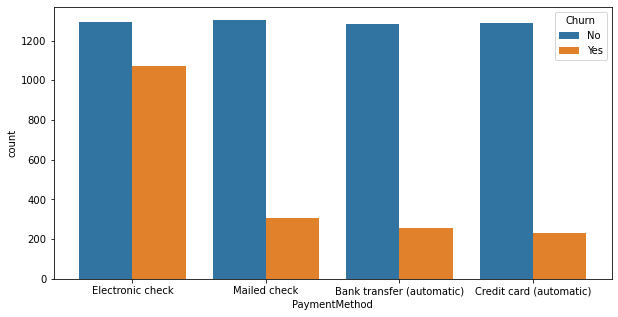

In [29]:
fig,axes=plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.plot()

The above countplots describe the Churn analysis with other features in the dataset 

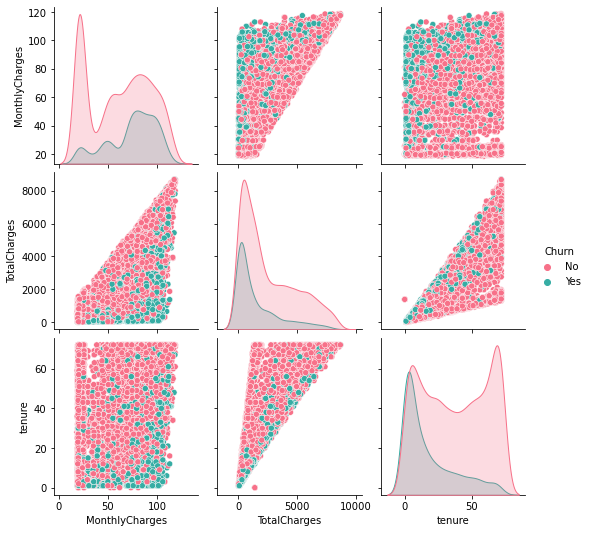

In [30]:
sns.pairplot(data=df,vars=['MonthlyCharges','TotalCharges','tenure'],hue='Churn', palette='husl')

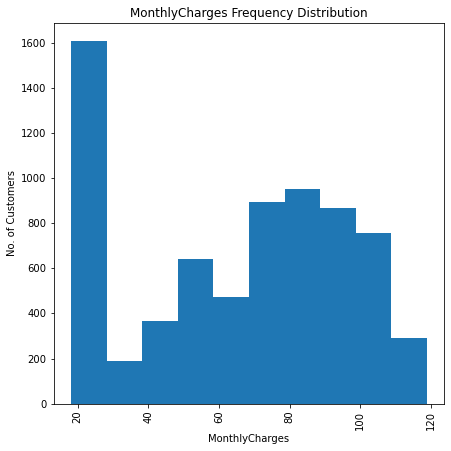

In [31]:
#Histogram of MonthlyCharges Frequency Distribution
plt.figure(figsize=(7,7))
plt.hist(df2["MonthlyCharges"], bins=10)
plt.xticks(rotation="vertical")
plt.title("MonthlyCharges Frequency Distribution")
plt.ylabel("No. of Customers")
plt.xlabel("MonthlyCharges")
plt.show()

Large number of customers (around 1600) pay MonthlyCharges between USD 20 to USD 30.
The MonthlyCharges frequency is not evenly distrubuted

In [32]:
df2.corr()['Churn']

SeniorCitizen       0.151278
tenure             -0.352681
MonthlyCharges      0.193197
TotalCharges       -0.225502
gender             -0.008765
Partner            -0.150660
Dependents         -0.164169
PhoneService        0.011895
MultipleLines       0.037883
InternetService    -0.047328
OnlineSecurity     -0.289667
OnlineBackup       -0.195799
DeviceProtection   -0.178401
TechSupport        -0.282844
StreamingTV        -0.036769
StreamingMovies    -0.038679
Contract           -0.396982
PaperlessBilling    0.191761
PaymentMethod       0.107407
Churn               1.000000
Name: Churn, dtype: float64

Correlation of the target variable with other features 

# According to the analysis, I came to the following conclusions:
1. 26.5% Customers have left the Company within last month.
2. The company has more no of Younger Generation than Senior Citizens with almost almost equal no of Male and Females.
3. Younger Generation Churn more than compared to the Senior Citizens. So the company must come up with more ideas in interest
of the Young people. 
4. The company provides phone services to many of the customers (i.e 6361 out of 7041).
5. The customers who is being provided Online Security Churn less. So the Company should increase the number of Customers 
with Online Security.
6. The customers with Technical Support tend to Churn less. So the Company should increase the number of Customers with Technical Support
7. The Customers with DSL as the Internet Service churn less as compared to the customers with Optical Fiber.
8. The Customers using Electronic Check as their Payment Method Churn more comparitively.
9. Customers with Yearly Contract tend to churn less as compared to customers with Monthly Contract

# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df2[["TotalCharges"]]=mm.fit_transform(df2[["TotalCharges"]])

Performed Feature Scaling on Total Charges

# Seperating the Dependent and Independent variables for Training and Testing of Data 

In [34]:
x=df2.iloc[:,:-1]
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,0.012700,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,0.440730,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,0.068292,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,0.434374,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,0.089861,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0.453644,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,0.917574,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,0.160798,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,0.148374,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [35]:
y=df2.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7041, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

# Model Building

Machine Learning Algorithms for Classification problems are:
Logistic Regression,
K Nearest Neighbor,
Naive Bayes,
Support Vector MAchines (SVC)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [38]:
def mymodel(model):
    model.fit(xtest,ytest)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print(f" Accuracy: {ac} \n {cm} \n {cr} ")

In [39]:
models=[]
models.append(("Logistic ",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Naive bayes", GaussianNB()))
models.append(("SVM", SVC()))

In [40]:
for name,model in models:
    print(name)
    mymodel(model)
    print("\n\n")

Logistic 
 Accuracy: 0.8091993185689949 
 [[1198  122]
 [ 214  227]] 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1320
           1       0.65      0.51      0.57       441

    accuracy                           0.81      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.80      0.81      0.80      1761
 



KNN
 Accuracy: 0.8387279954571266 
 [[1211  109]
 [ 175  266]] 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1320
           1       0.71      0.60      0.65       441

    accuracy                           0.84      1761
   macro avg       0.79      0.76      0.77      1761
weighted avg       0.83      0.84      0.83      1761
 



Naive bayes
 Accuracy: 0.7654741624077229 
 [[1013  307]
 [ 106  335]] 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1320
           1       0

Logistic Regression and KNN works well on the above dataset.
However KNN gives more accuracy compared to other Machine Learning Algorithms with an accuracy of 83%
